# Symmetrization & Procrustes

Here we show an example of symmetrizing contours, re-evaluating the contours and Procrustes aligning them.

The inputs:
1. path name; *pth*: the location of the folder that contains the CSVs (of the contours).
1. path for CSVs; *pth_for_CSVs*: the folder where you want to save the symmetrized contours.

Note, the code assumes that the CSVs containing the smoothed contours have the word "smoothed" in them - and it replaces that word with "symmetrized" when saving the symmetrized contours. If that's not the case, or you wish to name the new CSVs differently, then change the words in line 8 of the __Saving Individual CSVs__ tab below accordingly.

#### Imports

In [2]:
import numpy as np
import pandas as pd
from copy import deepcopy
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from cont_extraction import load_resize_image
from objSymmetrize import procrustes
from objSymmetrize import reorderPoints
from objSymmetrize import symmetrize
from objSymmetrize import rescale

### Symmetrization Example

In [ ]:
filenames = []
pth = "C:\\Users\\arian\\Documents\\testCSVs"

symmetrizedContours = []

errors = []

for file in os.listdir(pth):
    if ("csv" in file):
        try:
            filenames.append(file)
            csv = pd.read_csv(pth+"\\"+file)
            x = np.array(csv['x'])
            y = np.array(csv['y'])
            print("Symmetrizing contour "+file)
            xsym,ysym = symmetrize(x,y,cutEnds=True,reparamPoints=250,proportion=15)
            newx,newy = reorderPoints(xsym,ysym,rotate=True)
            symmetrizedContours.append([newx,newy])
        except:
            errors.append(file)
            
print("Symmetrized "+str(len(symmetrizedContours))+" contours")
print("Total Errors: "+str(len(errors)))

### Procrustes Example

In [23]:
n = len(filenames)

alignedContours = []
# 1) Set the template to be the first vase and that to the final list of aligned contours:
F0 = np.column_stack([symmetrizedContours[0][0],symmetrizedContours[0][1]])
alignedContours.append([symmetrizedContours[0][0],symmetrizedContours[0][1]])

# 2) Go through all the other vases and Procrustes align to the template vase:
for i in range(1,n):
    F = np.column_stack([symmetrizedContours[i][0],symmetrizedContours[i][1]])
    _,Fp,_,_,_ = procrustes(F0,F)
    # 3) Rescale to make sure it's within the desired range:
    xp,yp = rescale(Fp[:,0],Fp[:,1])
    alignedContours.append([xp,yp])
    
print("Procrustes aligned "+str(n)+" contours")

Procrustes aligned 5 contours


### Saving Individual CSVs

In [36]:
pth_for_CSVs = "C:\\Users\\arian\\Documents\\symmetrizedCSVs\\"

for p,file in enumerate(filenames):
    x = alignedContours[t][0]
    y = alignedContours[t][1]
    contourCSV = pd.DataFrame([x,y,list(range(1,len(y)+1))]).T
    contourCSV  = contourCSV.rename(columns={0:'x',1:'y',2:'pointOrder'})
    name = file.replace('smoothed','symmetrized')
    contourCSV.to_csv(pth_for_CSVs+name,index=False)

### Plot Example

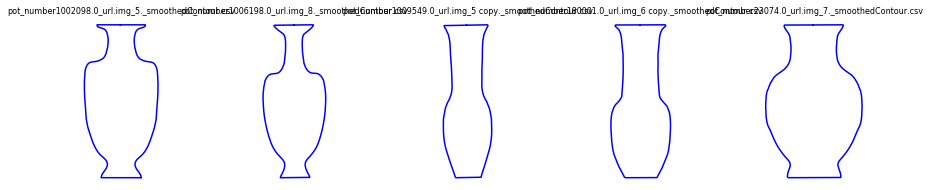

In [26]:
fig,ax = plt.subplots(1,n,figsize=(3*n,3))
for t,file in enumerate(filenames):
    x = alignedContours[t][0]
    y = alignedContours[t][1]
    ax[t].plot(x,y,'-b')
    ax[t].set_xlim([-1.6,1.6])
    ax[t].set_ylim([-1.6,1.6])
    ax[t].axis('off')
    ax[t].set_title(file,fontsize=8)
    
# NOTE: remove the hashtag before 'plt' if you wish to save the image and then run.
#plt.savefig('Symmetrized_Vases_Example.pdf',dpi=600,bbox_inches='tight',pad_inches=0.5)